# Import data and aggregate

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import os
import re
import datetime as dt
from matplotlib import pyplot  as plt
import seaborn as sns
sns.set_style("darkgrid",{'font.sans-serif':['simhei','Arial'],'grid.linestyle': '--'})

In [75]:
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from visualization import *
from aggregation import *
from data_handling import *

In [4]:
# Aggregated data before August
past = pd.read_excel('summary.xlsx')

In [5]:
# import data from folder named '账单汇总', which is all the transaction data after 08-01
dir = "账单汇总"

filename_excel = []
frames = []
for root, dirs, files in os.walk(dir):
    for file in files:
        filename_excel.append(os.path.join(root, file))
        df = pd.read_csv(os.path.join(root, file), skiprows=[
                         0, 1, 2, 3], header=0, infer_datetime_format=True, date_parser = True,skipfooter=4, encoding="gbk")
        frames.append(df)
data = pd.concat(frames)

In [11]:
data = pd.concat([past,data])

In [12]:
data['备注'] = [i.encode('utf-8') for i in data.备注]
data['备注'] = [get_chinese(i)[0]  for i in data.备注]
types = ['公交赏金', '地铁赏金', '支付宝推荐奖励','商家权益红包']
data_bus = data[data['备注']==types[0]]
data_bus['发生时间']=pd.to_datetime(data_bus['发生时间'])
data_bus.reset_index(inplace = True, drop = True)

AttributeError: 'NoneType' object has no attribute 'encode'

In [46]:
df = data_bus[['发生时间','收入金额（+元）']]
df['发生时间'] = [dt.datetime.strptime(x.strftime('%Y-%m-%d:%H'), '%Y-%m-%d:%H') for x in df['发生时间']]
df =df.pivot_table(index='发生时间',aggfunc='sum')

In [47]:
ts = df

# Time Series Analysis

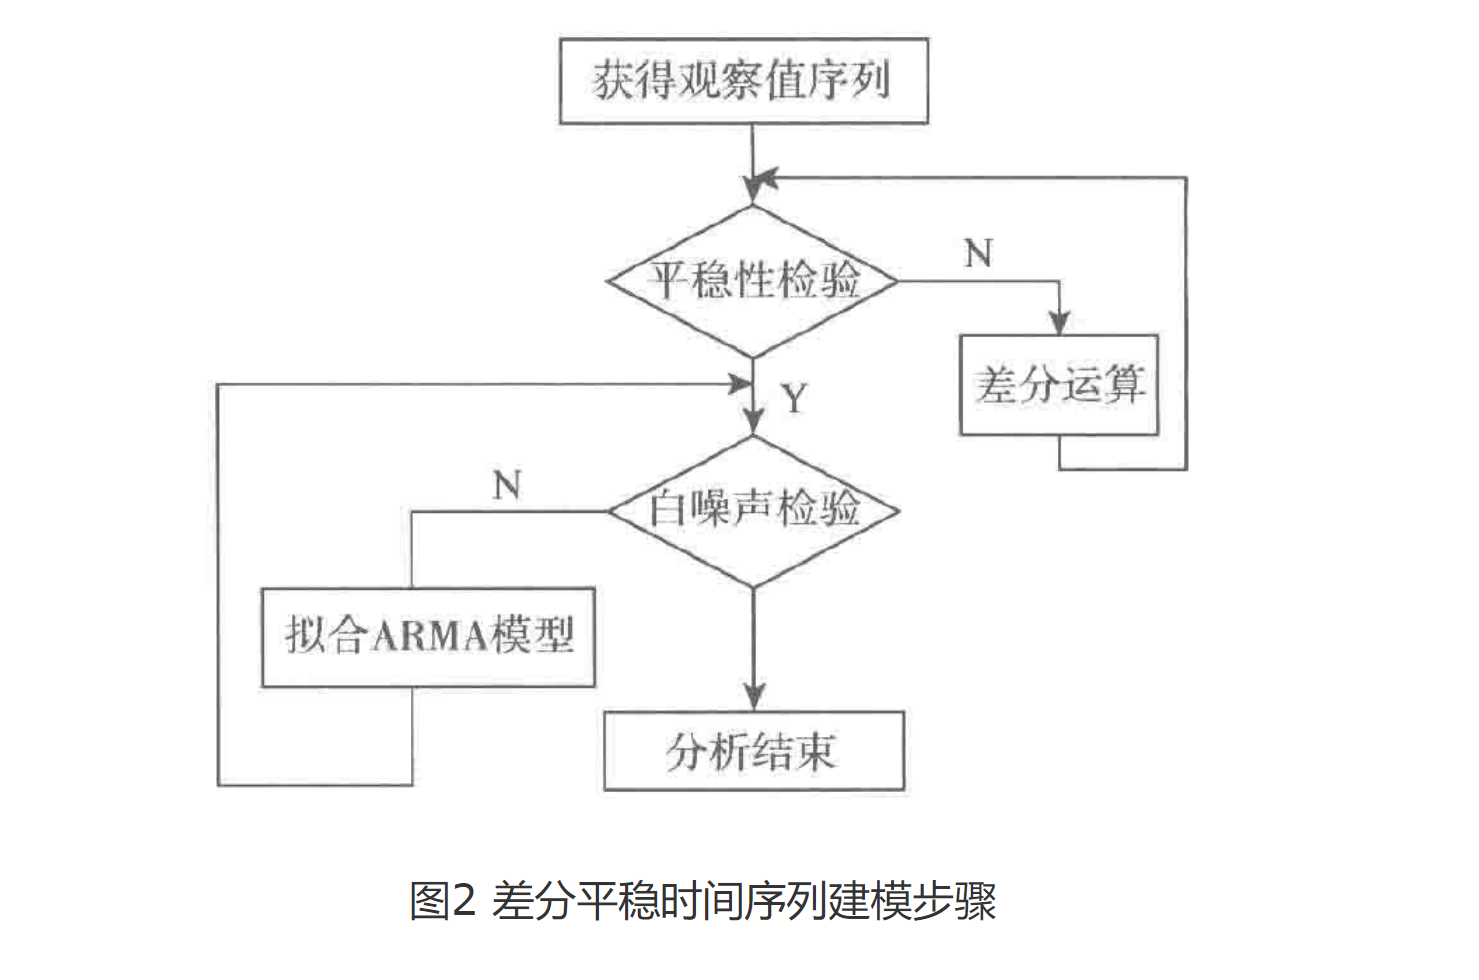

## Time series preprocessing

In [80]:
ts2 = ts['收入金额（+元）']

In [85]:
type(ts2)

pandas.core.series.Series

In [76]:
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller

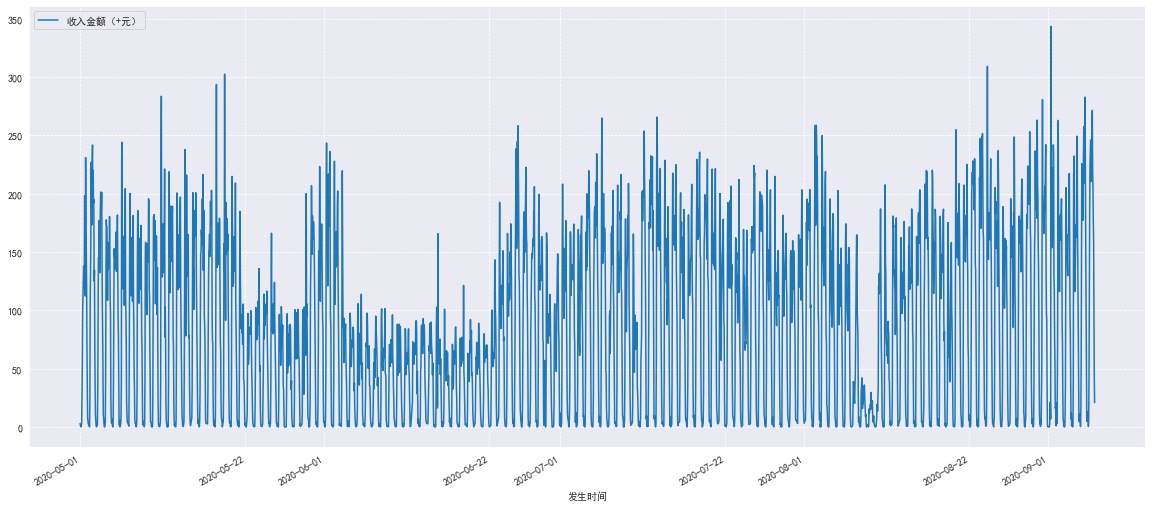

In [100]:
ts.plot(figsize=(20,9))

## 平稳性检测

In [106]:
adfuller(ts2, maxlag=None, regression='c', autolag='BIC', store=False, regresults=False)

(-3.4233857374678713,
 0.010187022712707309,
 24,
 2865,
 {'1%': -3.4326345265846516,
  '5%': -2.862549348242229,
  '10%': -2.5673073055685},
 27428.676474845768)

<li>ADF 检验：如果序列平稳则不存在单位根，反之则存在。原假设是序列存在单位根。
<li> p = 0.010187022712707309, 接近0， 拒绝原假设。根据ADF检验（序列基本平稳)

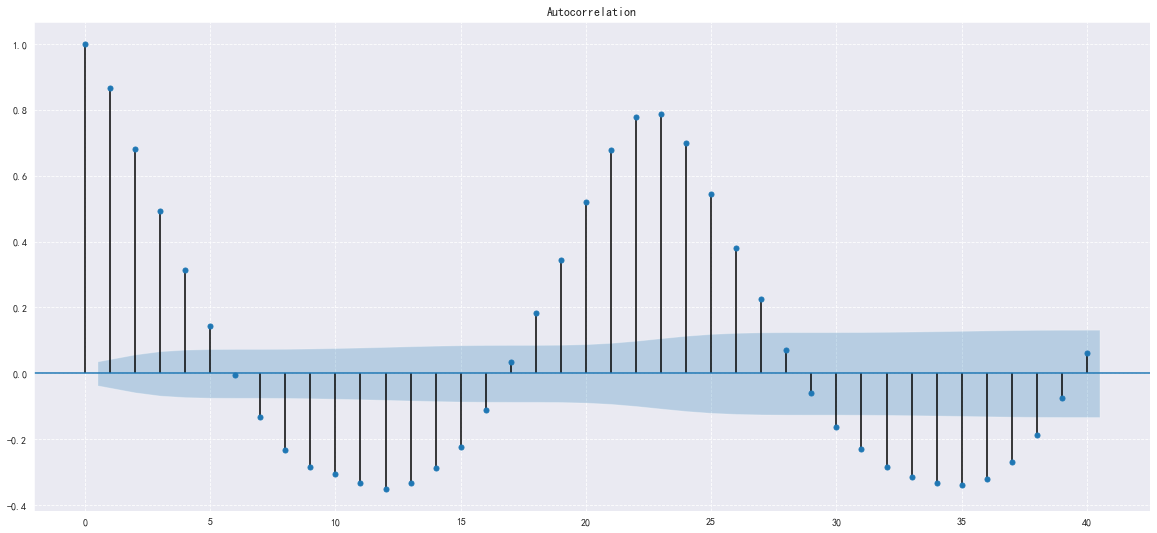

In [107]:
fig, ax = plt.subplots(figsize=(20, 9))
sm.graphics.tsa.plot_acf(ts2,lags=40,ax = ax)
plt.rcParams['axes.unicode_minus']=False 
plt.show()

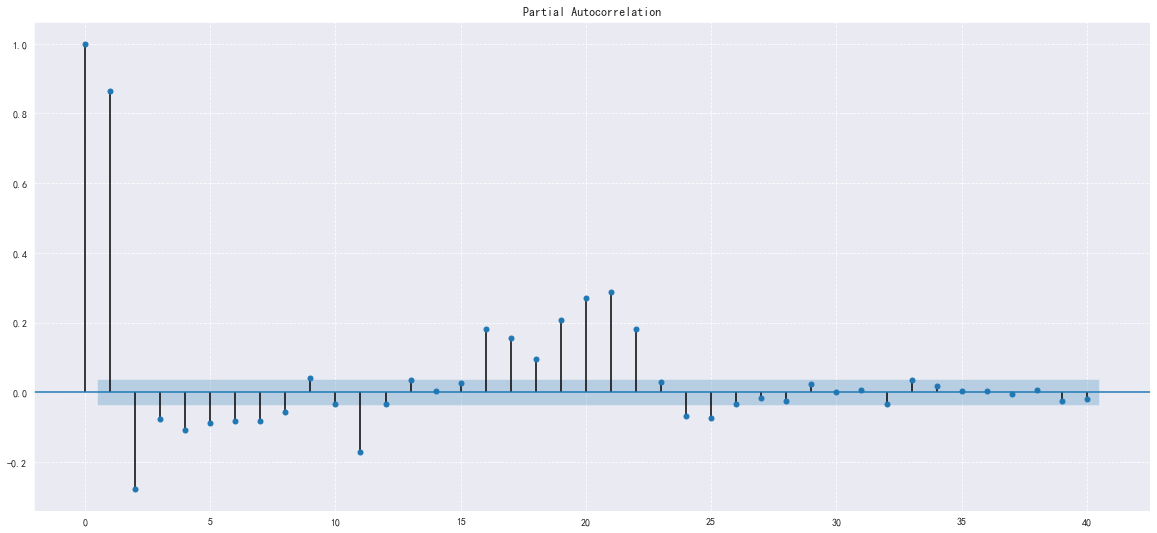

In [87]:
fig, ax = plt.subplots(figsize=(20, 9))
sm.graphics.tsa.plot_pacf(ts2,lags=40,ax = ax)
plt.rcParams['axes.unicode_minus']=False 
plt.show()

根据pacf和acf判断，应为两个拖尾，可选用ARMA模型